## Quadrilateral Plot: all angles in radian

In [26]:
import math
pi = math.pi
# input parameters: (x,y)=(a,b)
a =  1
b =  1
angle = 22.5   # in degree
angle = angle*pi/180
n = 50
error = 1e-8

In [27]:
# initial coordinates
square = [[0,0], [a, 0], [a,b], [0, b]]

In [28]:
# points
Y = [[0,0]]

In [29]:
# direction vectors
vector= [[math.cos(angle),math.sin(angle)]]

In [30]:
def reflect(coord, vector):
    if (eq(coord[0],0)) or (eq(coord[0],a)):
        return [-vector[0], vector[1]]
    elif eq(coord[1],0) or eq(coord[1],b):
        return [vector[0], -vector[1]]
    else:
        print('problem in relfection')

def theta(vector):
    return math.atan(vector[1]/vector[0])

def line_gety(angle, coord, x):
    return buff(coord[1]+math.tan(angle)*(x-coord[0]))

def line_getx(angle, coord, y):
    return buff(coord[0]+(y- coord[1])/math.tan(angle))

def which_square(coord):
    counter = 0
    for k in square:
        if coord == k:
            return counter
        counter +=1

def buff(number):
    if abs(number-a)<error:
        return a
    elif abs(number-b)<error:
        return b
    else:
        return number

def eq(number1, number2):
    if abs(number1-number2)<error:
        return True
    else:
        return False

In [31]:
def on_which_line(coord):
    if coord in square:
        return ['x='+str(coord[0])+' and y='+str(coord[1]), coord]
    if ((eq(coord[0],0) and 0<=coord[1]<=b)):
        return ['x=0',[2,1]]
    elif (eq(coord[0],a) and 0<=coord[1]<=b):
        return ['x=1',[2,2]]
    elif (eq(coord[1],0) and 0<=coord[0]<=a):
        return ['y=0',[2,3]]
    elif (eq(coord[1],b) and 0<=coord[0]<=a):
        return ['y=1',[2,4]]
    else:
        print('not on any line')

In [32]:
# define Y[1]
if 0<=buff(line_gety(angle, Y[0], a))<=b:
    Y.append([a, buff(line_gety(angle, Y[0], a))])
else:
    Y.append([buff(line_getx(angle, Y[0], b)),b])

# define vector[1]
vector.append(reflect(Y[1], vector[0]))

In [33]:
# works only for Y[2] and beyond
def next_coord(coord, vector):
    angle = theta(vector)
    beta = on_which_line(coord)[1]
    if beta[0]==2:
        if beta[1]!=1 and 0<=buff(line_gety(angle, coord, 0))<=b:
            return [0, buff(line_gety(angle, coord, 0))]
        elif (beta[1]!=2) and (0<=line_gety(angle, coord, a)<=b):
            return [a, buff(line_gety(angle, coord, a))]
        elif beta[1]!=3 and 0<=line_getx(angle, coord, 0)<=a:    
            return [buff(line_getx(angle, coord, 0)), 0]
        elif beta[1]!=4 and 0<=line_getx(angle, coord, b)<=a:
            return [buff(line_getx(angle, coord, b)),b]

In [34]:
for i in range(2, n):
    if Y[i-1] in square:
        # print('mashallah')
        step = i-1
        break
    # print(i)
    Y.append(next_coord(Y[i-1], vector[i-1]))
    vector.append(reflect(Y[i], vector[i-1]))

In [35]:
# x and y coordinates of reflected points:
Y_x=[]
Y_y=[]
for i in range(len(Y)):
    Y_x.append(Y[i][0])
    Y_y.append(Y[i][1])

In [36]:
# x coordinates of quadrilateral points:
S_x=[0]
S_y=[b]
for i in range(len(square)):
    S_x.append(square[i][0])
    S_y.append(square[i][1])

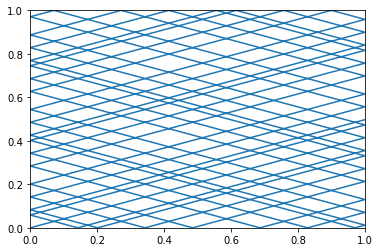

In [37]:
# plot a list of coordinates

import matplotlib.pyplot as plt
import numpy as np

#plt.plot(S_x, S_y)
plt.plot(Y_x,Y_y)

plt.xlim(0,a)
plt.ylim(0,b)

plt.show()

In [38]:
len(Y)

50